[View in Colaboratory](https://colab.research.google.com/github/mattbellis/particle_physics_simplified/blob/master/DEMO_ppp_h5hep.ipynb)

In [1]:
import numpy as np
import matplotlib.pylab as plt

# Check to see if the git repo is there. If not, then clone it. This is a test edit. 
!if [ ! -e h5hep ]; then git  clone https://github.com/mattbellis/h5hep.git; fi

# Pull the latest changes  
!cd h5hep; git pull

import sys
sys.path.append("./h5hep")
import h5hep

# This is for particle physics simplified
# Check to see if the git repo is there. If not, then clone it
!if [ ! -e particle_physics_simplified ]; then git  clone https://github.com/mattbellis/particle_physics_simplified.git; fi

# Pull the latest changes  
!cd particle_physics_simplified; git pull
sys.path.append("./particle_physics_simplified/tools")
import hep_tools as hep


Cloning into 'h5hep'...
remote: Counting objects: 359, done.
remote: Total 359 (delta 0), reused 0 (delta 0), pack-reused 359
Receiving objects: 100% (359/359), 7.04 MiB | 41.64 MiB/s, done.
Resolving deltas: 100% (186/186), done.
Already up-to-date.
Cloning into 'particle_physics_simplified'...
remote: Counting objects: 73, done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 73 (delta 40), reused 23 (delta 9), pack-reused 0
Unpacking objects: 100% (73/73), done.
Already up-to-date.


In [2]:
# Download the data
!mkdir -p data
!wget -O data/mc_ww.hdf5 'http://www.sos.siena.edu/~mbellis/ppp_data/mc_ww.hdf5?raw=true'

# This one might take 10 seconds or so. It's a bigger file.
!wget -O data/mc_ttbar.hdf5 'http://www.sos.siena.edu/~mbellis/ppp_data/mc_ttbar.hdf5?raw=true'

--2018-06-06 15:50:34--  http://www.sos.siena.edu/~mbellis/ppp_data/mc_ww.hdf5?raw=true
Resolving www.sos.siena.edu (www.sos.siena.edu)... 66.194.178.32
Connecting to www.sos.siena.edu (www.sos.siena.edu)|66.194.178.32|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268544 (262K) [text/plain]
Saving to: ‘data/mc_ww.hdf5’

data/mc_ww.hdf5     100%[===================>] 262.25K   402KB/s    in 0.7s    

2018-06-06 15:50:35 (402 KB/s) - ‘data/mc_ww.hdf5’ saved [268544/268544]

--2018-06-06 15:50:36--  http://www.sos.siena.edu/~mbellis/ppp_data/mc_ttbar.hdf5?raw=true
Resolving www.sos.siena.edu (www.sos.siena.edu)... 66.194.178.32
Connecting to www.sos.siena.edu (www.sos.siena.edu)|66.194.178.32|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47106586 (45M) [text/plain]
Saving to: ‘data/mc_ttbar.hdf5’

data/mc_ttbar.hdf5  100%[===================>]  44.92M  5.51MB/s    in 13s     

2018-06-06 15:50:49 (3.53 MB/s) - ‘data/mc_ttbar.hdf5’ save

# An example with a more "real" approach to interfacing with the data

In [4]:
data,event = h5hep.hd5events('data/mc_ww.hdf5') # For example
# or
#data,event = h5hep.hd5events('data/mc_ttbar.hdf5') # For example, if you want to run over a bigger file

Building the indices...
Built the indices!
Data is read in and input file is closed.


In [5]:
print()
# Print the keys to see what is in the dictionary
for key in event.keys():
  print(key)
  
print()

print(data['nevents'])


METx
METy
_SINGLETON_/INDEX
electrons/e
electrons/nelectrons
electrons/px
electrons/py
electrons/pz
electrons/q
jets/btag
jets/e
jets/njets
jets/px
jets/py
jets/pz
muons/e
muons/nmuons
muons/px
muons/py
muons/pz
muons/q
photons/e
photons/nphotons
photons/px
photons/py
photons/pz

4580


# Make a histogram of the jet energies

In [7]:
nevents = data['nevents']

energies = []

for i in range(nevents):
  
  if i%10000==0:
    print("On ",i," of ",nevents)
  
  h5hep.unpack(event,data,n=i)

  energy = event['jets/e']
  
  # This returns a numpy.array of the jet energies. 
  # To easily append them to your list
  energies += energy.tolist()
  
  # DO STUFF HERE IF YOU LIKE!

On  0  of  4580


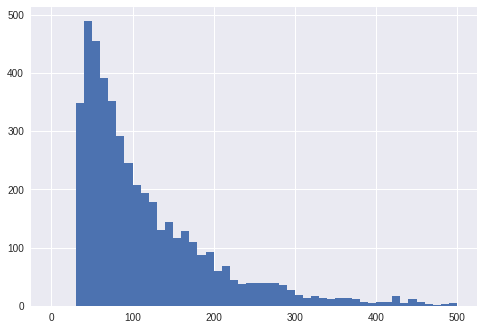

In [8]:
# Make a plot!
plt.figure()
plt.hist(energies,bins=50,range=(0,500));

# An example with the simplified interface...version 1

In [7]:
infile = 'data/mc_ttbar.hdf5'

collisions = hep.get_collisions(infile,experiment='CMS',verbose=False)
print(len(collisions), " collisions")


Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
383167  collisions


In [8]:
energies = []
for entry, collision in enumerate(collisions):
  
    if entry%10000 == 0:
        print(entry)

    jets = collision['jets']

    for jet in jets:
        e = jet['e']
        #print(e)

        energies.append(e)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000


In [5]:


#infile = 'data/mc_ww.hdf5'
# or
infile = 'data/mc_ttbar.hdf5'

collisions = hep.get_collisions(infile,experiment='CMS',verbose=False)
print(len(collisions), " collisions")

energies = []
for entry, collision in enumerate(collisions):
  
    if entry%10000 == 0:
        print(entry)

    jets = collision['jets']

    for jet in jets:
        e = jet['e']
        #print(e)

        energies.append(e)





Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
383167  collisions
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000


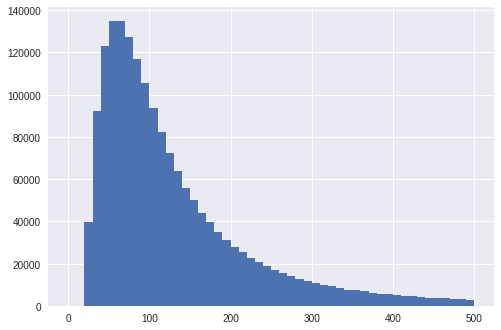

In [11]:
plt.figure()
plt.hist(energies,bins=50,range=(0,500));

# BaBar data

In [0]:
###############################################################################
def invmass(p4s):
  etot = 0
  pxtot = 0
  pytot = 0
  pztot = 0
  for p4 in p4s:
    etot += p4['e']
    pxtot += p4['px']
    pytot += p4['py']
    pztot += p4['pz']
  m2 = etot*etot - (pxtot*pxtot + pytot*pytot + pztot*pztot)
  if m2>=0:
    return np.sqrt(m2)
  else:
    return np.sqrt(-m2)
###############################################################################
    

In [13]:
# This one might take 10 seconds or so. It's a bigger file.
!wget -O data/basicPID_R24-AllEvents-Run1-OnPeak-R24-744.hdf5 'http://www.sos.siena.edu/~mbellis/ppp_data/basicPID_R24-AllEvents-Run1-OnPeak-R24-744.hdf5?raw=true'

--2018-06-05 15:22:51--  http://www.sos.siena.edu/~mbellis/ppp_data/basicPID_R24-AllEvents-Run1-OnPeak-R24-744.hdf5?raw=true
Resolving www.sos.siena.edu (www.sos.siena.edu)... 66.194.178.32
Connecting to www.sos.siena.edu (www.sos.siena.edu)|66.194.178.32|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11765213 (11M) [text/plain]
Saving to: ‘data/basicPID_R24-AllEvents-Run1-OnPeak-R24-744.hdf5’

data/basicPID_R24-A 100%[===================>]  11.22M  2.76MB/s    in 5.1s    

2018-06-05 15:22:57 (2.22 MB/s) - ‘data/basicPID_R24-AllEvents-Run1-OnPeak-R24-744.hdf5’ saved [11765213/11765213]



In [14]:
infile = 'data/basicPID_R24-AllEvents-Run1-OnPeak-R24-744.hdf5'

collisions = hep.get_collisions(infile,experiment='BaBar',verbose=False)
print(len(collisions), " collisions")

    
energies = []
masses = []
for entry, collision in enumerate(collisions):
      
    if entry%10000 == 0:
        print(entry)

    muons = collision['muons']
    kaons = collision['kaons']

    nmuons = len(muons)
    for i in range(0,nmuons-1):
      for j in range(i+1,nmuons):
        
        if muons[i]['q']*muons[j]['q'] < 0:
          mass = invmass([muons[i],muons[j]])
          masses.append(mass)
        #print(e)

        #energies.append(e)




Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
92096  collisions
0
10000
20000
30000
40000
50000
60000
70000
80000
90000


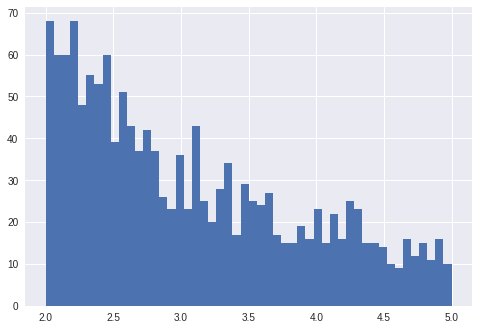

In [15]:
plt.figure()
plt.hist(masses,bins=50,range=(2,5));

In [16]:
infile = 'data/basicPID_R24-AllEvents-Run1-OnPeak-R24-744.hdf5'

collisions = hep.get_collisions(infile,experiment='BaBar',verbose=False)
print(len(collisions), " collisions")

energies = []
masses = []
for entry, collision in enumerate(collisions):
      
    if entry%10000 == 0:
        print(entry)

    pions = collision['pions']
    kaons = collision['kaons']

    npions = len(pions)
    nkaons = len(kaons)
    
    for k in range(0,nkaons):
      for i in range(0,npions-1):
        for j in range(i+1,npions):

          if pions[i]['q']*pions[j]['q'] > 0 and kaons[k]['q']*pions[i]['q'] < 0:
            mass = invmass([pions[i],pions[j],kaons[k]])
            masses.append(mass)




Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
92096  collisions
0
10000
20000
30000
40000
50000
60000
70000
80000
90000


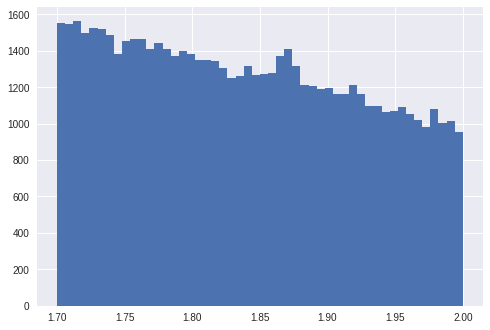

In [17]:
plt.figure()
plt.hist(masses,bins=50,range=(1.7,2.0));

# An example with the simplified interface...version 2

In [9]:
infile = 'data/mc_ttbar.hdf5' # Larger file
#infile = 'data/mc_ww.hdf5' # Smaller file

alldata = hep.get_all_data(infile,verbose=False)

nentries = hep.get_number_of_entries(alldata)

print("# entries: ",nentries)



Loading in the data...

Building the indices...
Built the indices!
Data is read in and input file is closed.
# entries:  383167


In [10]:
energies = []

for entry in range(nentries):

    collision = hep.get_collision(alldata,entry_number=entry,experiment='CMS')

    if entry%10000 == 0:
        print(entry)
    
    # Could do this if you only want to run on some events
    #if entry>10000:
    #  break

    jets = collision['jets']

    for jet in jets:
        e = jet['e']
        #print(e)

        energies.append(e)



0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000


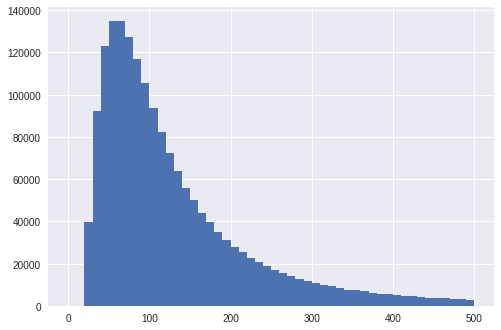

In [8]:
plt.figure()
plt.hist(energies,bins=50,range=(0,500));

